In [1]:
# Package 버전 확인
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

numpy     : 1.20.2
scipy     : 1.6.2
sklearn   : 0.0
pandas    : 1.2.4
matplotlib: 3.4.1



In [2]:
# 필요한 함수 import
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# sklean 오픈 dataset 에서 fetch_openml을 가져온 후 mnist data를 다운로드 한다.
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
# mnist 데이터 확인
mnist["data"]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 입력, 타겟 분리
X, y = mnist["data"], mnist["target"]

# 데이터 타입 확인
# X 는 DataFrame, y는 Series
print("Type(X) :",type(X))
print("Type(y) : ",type(y))

# 데이터 shape 확인
print("X.shape :",X.shape)
print("y.shape :",y.shape)

Type(X) : <class 'pandas.core.frame.DataFrame'>
Type(y) :  <class 'pandas.core.series.Series'>
X.shape : (70000, 784)
y.shape : (70000,)


In [5]:
# X : DataFrame은 배열처럼 사용하기 어렵기 때문에 사용이 편리한 numpy로 변경
X = X.to_numpy()
# y : Target 값을 정수형으로 두기 위해서 int로 변형
y = y.astype(np.int)

# 데이터 타입 확인
print("Type(X) :",type(X))
print("Type(y) : ",type(y))

Type(X) : <class 'numpy.ndarray'>
Type(y) :  <class 'pandas.core.series.Series'>


<ipython-input-5-7213b470f7c1>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


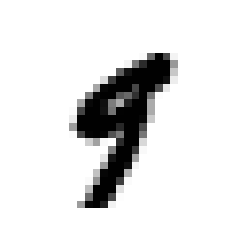

In [6]:
# 입력 데이터는 다음과 같은 숫자 이미지 데이터이다.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()

In [7]:
# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np

# 섞어준다.
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [8]:
###  이진 분류 ###

# 훈련, 테스트 타겟 중 5인 값은 true, 5가 아닌 값은 flase가 되는 타겟 데이터 셋을 만든다.
y_train_5 = (y_train == 5) # True or Flase
y_test_5 = (y_test == 5)

# 이진 분류를 수행할 선형 분류기인 SGDClassifier를 가져온다.
from sklearn.linear_model import SGDClassifier

# 기본적인 hyperparameter를 설정한다.
sgd_clf = SGDClassifier(max_iter=5, random_state=42)

# 훈련 입력 데이터, 훈련 타겟 데이터로 학습을 진행한다.
sgd_clf.fit(X_train, y_train_5)

C:\Users\whdgk\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=5, random_state=42)

In [9]:
# 이제 학습된 모델로 예측을 수행해본다.
sgd_clf.predict([some_digit]) # some_digit 은 위에서 9 였음.
# 9는 5가 아니기 때문에 False가 나오는게 이상적.

array([False])

In [10]:
# 학습한 이진 분류기의 정확도를 살펴본다. 이때 교차 검증을 이용함.
# 3겹 폴드 교차검증을 이용하면, 훈련 셋을 3개로 나누고 각각 학습시킨것에 나머지를 적용해서 정확도를 판별함.
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\Users\whdgk\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\whdgk\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\whdgk\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.964 , 0.9579, 0.9571])

In [11]:
# 정확도가 높게 나오는데...

# 여기서 중요한 점은 Classifier의 성능을 "정확도"로 판단할 수 있는가? 라는 점이다.

# 이 점에 대해서 눈으로 확인하기 위해서 모든 이미지를 FALSE(5 아님)으로 분류하는 더미 분류기를 만들어 본다.
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
never_5_clf.fit(X,None)

never_5_clf.predict(X_train[0:10])

# 모두 5 아님 즉 False로 출력하는 것을 확인할 수 있다.

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [12]:
# 이 이상한 분류기의 성능을 "정확도"로 판단해 보자.
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

# 상당히 높은 값이 나올 수 밖에 없다. 왜냐하면 모든 이미지 (0~9) 중 5의 비율이 10% 정도이기 때문.
# 따라서 모든 입력에 대해 "5가 아니다" 라는 결과를 만들 경우, 90% 정도는 맞출 수 있다는 얘기가 됨.

# 결국 분류기의 성능은 "정확도" 만으로 판단할 수는 없음을 알 수 있다.

array([0.909  , 0.90745, 0.9125 ])

In [13]:
### 오차 행렬 ###
# 오차 행렬은 분류기의 성능을 평가하는데 사용되는 방법.
# 오차 행렬의 행 : 실제 클래스
# 오차 행렬의 열 : 예측한 클래스

# 2x2 행렬의 경우, 1행 1열, 2행 2열의 숫자가 실제 클래스와 예측한 클래스가 같은 경우를 나타냄.

In [14]:
# 오차 행렬을 만들기 위한 예측 값 만들기
# Cross_val_predict는 교차 검증을 통해서 각 입력에 대한 예측 값을 만들어 냄.
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

C:\Users\whdgk\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\whdgk\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\whdgk\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [15]:
# confusion matrix 라는 함수를 이용해서 오차 행렬을 만들어 보자.
# 여기서 오차 행렬은 타겟 값과 예측 값을 통해서 만든다.

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54058,   521],
       [ 1899,  3522]], dtype=int64)

In [16]:
### 오차 행렬의 각 항목의 의미
#
#             5 아님 예측         5 맞음 예측
# 5 아님      5 아님-> 5 아님     5 아님 -> 5 맞음
#
# 5 맞음      5 맞음 -> 5 아님    5 맞음 -> 5 맞음

# 진짜 음성 : 1행 1열
# 거짓 양성 : 1행 2열
# 거짓 음성 : 2행 1열
# 진짜 양성 : 2행 2열

In [17]:
### 오차 행렬을 통한 주요 성능 지표 2 가지
# 1. 정밀도 : 양성으로 예측 한 갯수 중 진짜 양성의 수 = 진짜 양성/ (진짜 양성 + 거짓 양성)
# 2. 재현율 : 전체 양성 입력 중 예측기가 맞춘 수 = 진짜 양성 / (진짜 양성 + 거짓 음성)

# 사이킷런 패키지를 이용하여 정밀도와 재현율을 얻어보자.
from sklearn.metrics import precision_score, recall_score
print("정밀도 :",precision_score(y_train_5, y_train_pred))
print("재현율 :", recall_score(y_train_5, y_train_pred))

정밀도 : 0.8711352955725946
재현율 : 0.6496956281128943


In [18]:
### 정밀도와 재현율의 trade-off 관계
# 분류기도 결국 특정 예측에 대한 값과 임계값을 토대로 양성과 음성을 판단함.
# 임계 값이 높아지면 까다롭게 평가한다는 뜻 : 조금만 5가 아닌 것 같아도 5 아님 으로 판단
# 임계 값이 낮으면 왠만하면 양성으로 쳐준다는 뜻 : 왠만큼 5랑 닮았으면 5 맞음 으로 판단

# 만약 임계값이 엄청 낮아서 거의 대부분의 숫자를 "5 맞음"으로 판단한다면, 재현율은 100%에 가까워 질 것임.
# 왜냐하면 모든 5 입력이 거의 5로 판단될 것이기 때문.
# 그러나 다른 숫자들도 5로 판단할 확률이 높기 때문에 정밀도는 낮아짐.
# 반대로 생각해서 임계값을 높이면 정밀도는 높아지고 재현율은 낮아질 것을 알 수 있음.
# 따라서 목적에 따라서 정밀도를 높일지, 재현율을 높일지를 결정해야 함.

In [20]:
# 예측에 사용한 점수 (값)을 토대로 임계 값을 조절해 가며 정밀도와 재현율을 살펴보자.
# predict() 대신 decision_function() 함수로 결과가 아닌 점수를 얻을 수 있음.
y_scores = sgd_clf.decision_function([some_digit]) # 9
print("y_scores : ", y_scores)
threshold = -100000000 # 임계 값
y_some_digit_prediction = (y_scores > threshold) # 임계값 보다 크면 Ture (5 맞음)로 판단
print("y_some_digit_prediction : ", y_some_digit_prediction)

y_scores :  [-400042.39513131]
y_some_digit_prediction :  [ True]


C:\Users\whdgk\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\whdgk\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\whdgk\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


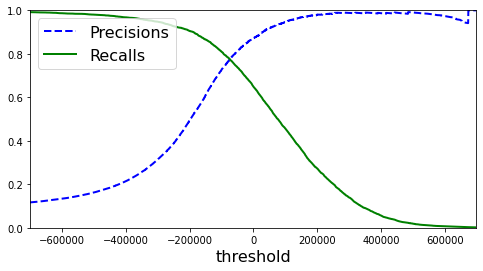

In [22]:
# 임계값에 따라서 True, False를 결정할 수 있음.

# 모든 입력에 대한 점수를 구해 보자
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = "decision_function")

# precision_recall_curve() 함수로 모든 임계값에 대한 정밀도와 재현율을 계산할 수 있음.
# 역시 이런 편리한 점이 라이브러리를 사용하는 이유
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precisions", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recalls", linewidth=2)
    plt.xlabel("threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

In [28]:
# Threshold 값을 고려하여 정밀도 90% 정도의 분류기를 만들어보자.
# 임계값을 3만 정도로 하니 정밀도는 90% 이상 나옴.
# 그러나 재현율이 60% 정도 밖에 나오지 않는다.
y_train_pred_90 = (y_scores > 30000)

print("정밀도 : ",precision_score(y_train_5, y_train_pred_90))

print("재현율 : ",recall_score(y_train_5, y_train_pred_90))

정밀도 :  0.9006473402758233
재현율 :  0.590296993174691
